In [2]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from collections.abc import Callable
import ipympl
import math
%matplotlib ipympl

# Implementacja Metody Siecznych

In [3]:
def secant_method(f: Callable, start_point: float, end_point: float, stop: str, rho: float, max_iter:int = 1000) -> Callable[[np.float64], np.float64]:
  if(stop != 'residual'and stop != 'incremental'):
    raise Exception("Wrong stop condition")
  x1 = min(start_point, end_point)
  x2 = max(start_point, end_point)
  
  for i in range(max_iter):
    x1,x2 = x2, x2 - f(x2) * (x2-x1)/(f(x2)-f(x1))
    if(stop == 'incremental' and abs(x2-x1) < rho):
      return x2,i+1 
    if(stop == 'residual' and abs(f(x2)) < rho):
      return x2,i+1
  # raise RuntimeError(f"Secant method did not converge within {max_iter} iterations")
  return x2,i+1

In [4]:
x1 = -1.0
x2 = -0.5
f = lambda x: x**12 - (1-x)**14
f_deriv = lambda x: 12*(x**11) + 14 * (1-x)**13
secant_method(f,x1,x2,'incremental', 0.01, 100)

(-0.49092885065246394, 1)

# Implementacja Metody Newtona

In [5]:
def newton_method(f: Callable, f_deriv: Callable, start_point:float, stop: str, rho: float, max_iter:int = 1000) -> float:
  if(stop != 'residual'and stop != 'incremental'):
      raise Exception("Wrong stop condition")
  
  x = start_point
  
  for i in range(max_iter):
    dfx = f_deriv(x)

    # if dfx == 0:
    #   raise ValueError("Derivative is zero. No convergence.")
    
    x1 = x - f(x)/dfx
    
    if(stop == 'incremental' and abs(x1-x) < rho):
      return x1, i+1
    if(stop == 'residual' and abs(f(x1)) < rho):
      return x1, i+1
    
    x = x1
  
  print(f"Newton method did not converge within {max_iter} iterations")
  # raise RuntimeError(f"Newton method did not converge within {max_iter} iterations")
  return x1, i+1


# Wizualizacja

In [6]:
def plot_function(
  x_values: np.ndarray[np.float64],
  func_to_plot: Callable[[np.float64], np.float64],
  nodes: np.ndarray | None = None,
  x_lim: tuple[float, float] | None = None,
  y_lim: tuple[float, float] | None = None,
  x_scale: str = 'linear',
  y_scale: str = 'linear',
  function_name: str = 'Funkcja bazowa',
  nodes_name: str = '',
  title: str = 'Wizualizacja funkcji',
  linestyle: str = '-', 
  color: str | None = None,
  alpha: float = 1.0,
  draw_axes = False,
  yticks_num = None,
  xticks_num = None
):
  y_values = np.array([func_to_plot(x) for x in x_values])

  if(color):
    plt.plot(x_values, y_values, label=function_name,
            linestyle=linestyle, color=color, alpha=alpha)
  else:
    plt.plot(x_values, y_values, label=function_name,
            linestyle=linestyle, alpha=alpha)
  
  if nodes is not None:
    if(color):
      plt.scatter(nodes[:, 0], nodes[:, 1], color=color,
                  label=nodes_name, s=15, zorder=5)
    else:
      plt.scatter(nodes[:, 0], nodes[:, 1],
                  label=nodes_name, s=15, zorder=5)

  plt.xlabel('x')
  plt.ylabel('y')

  if x_lim:
    plt.xlim(x_lim)
  if y_lim:
    plt.ylim(y_lim)
  if(draw_axes):
    plt.axhline(0,color='black',lw=0.8)
    plt.axvline(0,color='black', lw=0.8)
  
  plt.xscale(x_scale)
  plt.yscale(y_scale)
  
  if(yticks_num is not None):
    yticks = np.linspace(*plt.ylim(), num=yticks_num)
    plt.yticks(yticks)
  if(xticks_num is not None):
    xticks = np.linspace(*plt.ylim(), num=xticks_num)
    plt.xticks(xticks)
  plt.legend()
  plt.title(title)
  plt.grid(True)


# Zapisywanie wyników

-0.7144552264251988
-0.7144552264251988


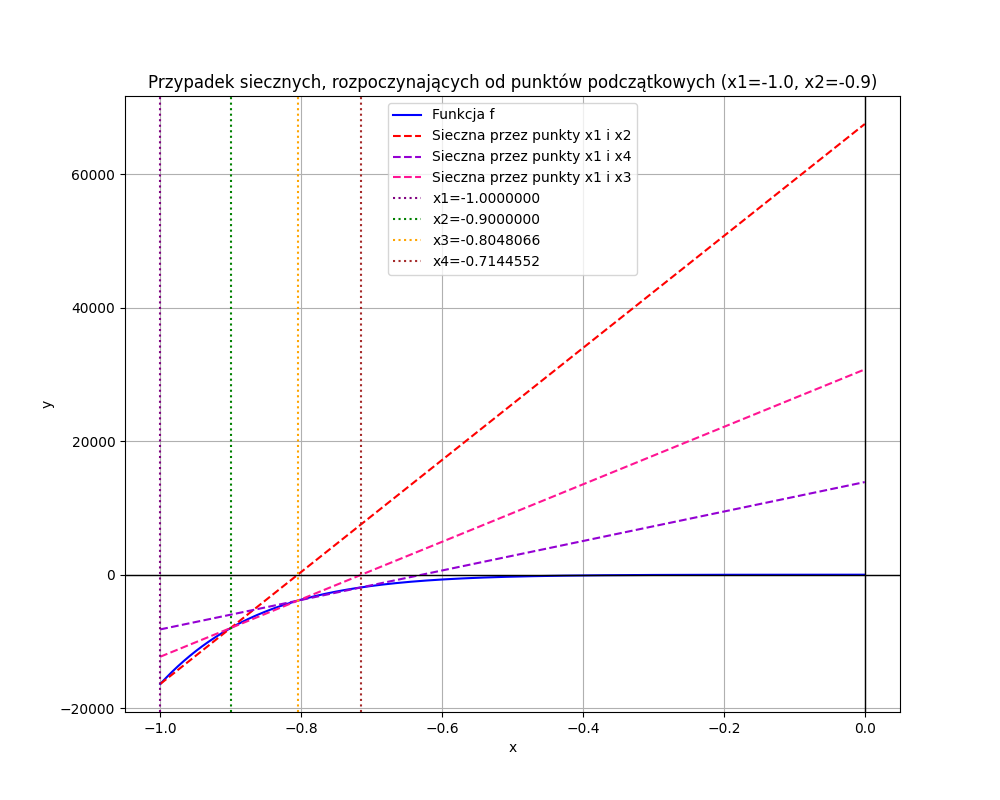

In [10]:
x1=-1.0
x2=-0.9
# x3=-0.8

f = lambda x: x**12 - (1-x)**14
f_deriv = lambda x: 12*(x**11) + 14 * (1-x)**13
x, iters = secant_method(f,x1,x2,'incremental', 0.01, 1)
x_alt, iters = secant_method(f,x2,x,'incremental', 0.01,1 )

a = (f(x2) - f(x1))/(x2 - x1)
b = f(x1) - a * x1
line = lambda x: a*x + b

print(x_alt)

a3 = (f(x) - f(x2))/(x - x2)
b3 = f(x2) - a3 * x2
line_alt = lambda x: a3*x + b3

a4 = (f(x_alt) - f(x))/(x_alt - x)
b4 = f(x) - a4 * x
line_alt_2 = lambda x: a4*x + b4

print(x_alt)

plt.figure(figsize=(10, 8)) 
fine_x = np.linspace(-1,0,10000)
plot_function(fine_x, f, draw_axes=True, color="blue", title="Przypadek siecznej o wysokim współczynniku kierunkowym", function_name="Funkcja f")
plot_function(fine_x, line, draw_axes=True, color="red", linestyle="dashed", title="Przypadek siecznej przechodzącej przez punkty x1=-1, x2=-0.5", function_name="Sieczna przez punkty x1 i x2")
plot_function(fine_x, line_alt_2, draw_axes=True, color="darkviolet", linestyle="dashed", title="Przypadek siecznych przechodzących przez punkty x1=-1.0, x2=-0.9 oraz x1=-1.0, x4=-0.744", function_name="Sieczna przez punkty x1 i x4")
plot_function(fine_x, line_alt, draw_axes=True, color="deeppink", linestyle="dashed", title=f"Przypadek siecznych, rozpoczynających od punktów podczątkowych (x1=-1.0, x2={x2})", function_name="Sieczna przez punkty x1 i x3")
plt.axvline(x=x1, color='purple', linestyle='dotted', label=f"x1={x1:.7f}")
plt.axvline(x=x2, color='green', linestyle='dotted', label=f"x2={x2:.7f}")
plt.axvline(x=x, color='orange', linestyle='dotted', label=f"x3={x:.7f}")
plt.axvline(x=x_alt, color='brown', linestyle='dotted', label=f"x4={x_alt:.7f}")
# plt.axvline(x=x_alt, color='orange', linestyle='dotted', label="Wyznaczony pierwiastek")
# plt.plot(x,f(x), 'rx', color='orange', markersize=10)
plt.legend()
plt.show()


Newton method did not converge within 1 iterations
0.5
0.47580645161290325
0.4733097286891146
0.4733110132982013


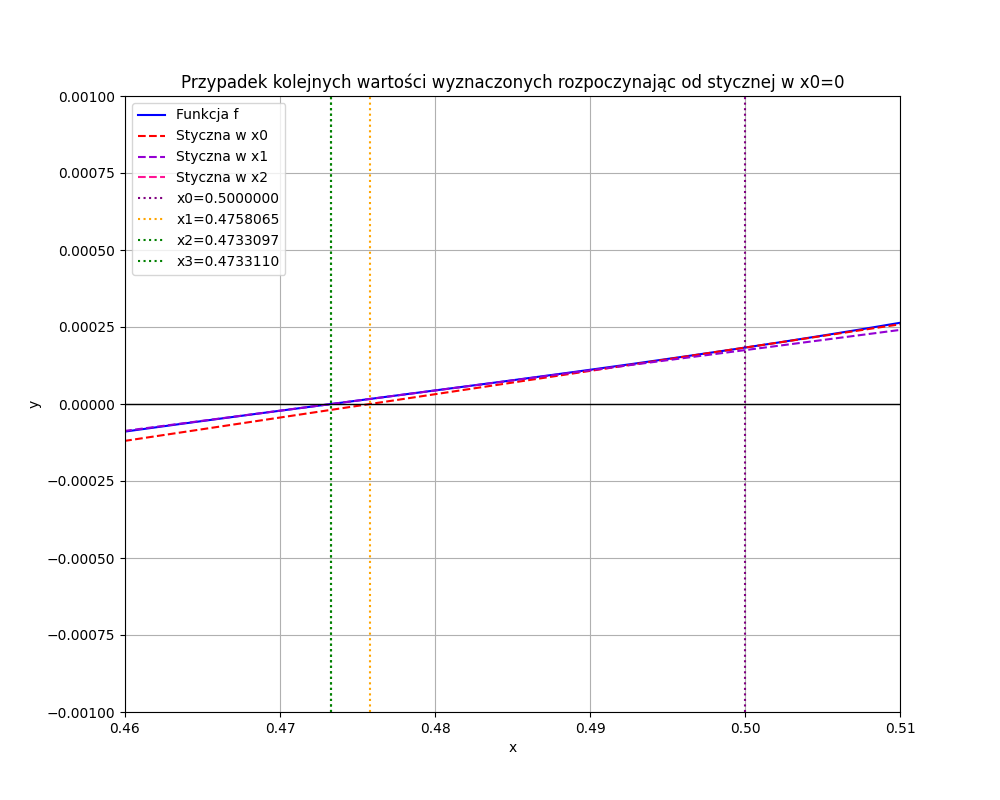

In [8]:
x0 = 0.5

f = lambda x: x**12 - (1-x)**14
f_deriv = lambda x: 12*(x**11) + 14 * (1-x)**13
x, iters = newton_method(f,f_deriv, x0,'incremental', 0.01, 1)
x_alt, iters = newton_method(f,f_deriv,x,'incremental', 0.01,1 )
x_alt_2, iters = newton_method(f,f_deriv,x_alt,'incremental', 0.01,1 )

a = f_deriv(x0)
b = f(x0) - a * x0
line = lambda x: a*x + b

a3 = f_deriv(x)
b3 = f(x) - a3 * x
line_alt = lambda y: a3*y + b3

a4 = f_deriv(x_alt)
b4 = f(x_alt) - a4 * x1
line_alt_2 = lambda x: a4*x + b4

print(x0)
print(x)
print(x_alt)
print(x_alt_2)

plt.figure(figsize=(10, 8)) 
fine_x = np.linspace(0,1,10000)
# plot_function()
# plot_function(fine_x, f, draw_axes=True, color="blue", title="Przypadek siecznej o wysokim współczynniku kierunkowym", function_name="Funkcja f" ,x_lim=[0.473,0.476])
plot_function(fine_x, f, draw_axes=True, color="blue", title="Przypadek siecznej o wysokim współczynniku kierunkowym", function_name="Funkcja f" ,x_lim=[0.46,0.51], y_lim=[-0.001,0.001])
plot_function(fine_x, line, draw_axes=True, color="red", linestyle="dashed", title="Przypadek kolejnych wartości wyznaczonych rozpoczynając od stycznej w x0=0", function_name="Styczna w x0")
plot_function(fine_x, line_alt, draw_axes=True, color="darkviolet", linestyle="dashed", function_name="Styczna w x1")
plot_function(fine_x, line_alt_2, draw_axes=True, color="deeppink", linestyle="dashed", function_name="Styczna w x2", title="Przypadek kolejnych wartości wyznaczonych rozpoczynając od stycznej w x0=0")
plt.axvline(x=x0, color='purple', linestyle='dotted', label=f"x0={x0:.7f}")
# plt.axvline(x=x2, color='green', linestyle='dotted', label="x2=-0.9")
# plt.axvline(x=x, color='orange', linestyle='dotted', label="x3=-0.804")
plt.axvline(x=x, color='orange', linestyle='dotted', label=f"x1={x:.7f}")
plt.axvline(x=x_alt, color='green', linestyle='dotted', label=f"x2={x_alt:.7f}")
plt.axvline(x=x_alt, color='green', linestyle='dotted', label=f"x3={x_alt_2:.7f}")
# plt.axvline(x=x_alt, color='orange', linestyle='dotted', label="Wyznaczony pierwiastek")
# plt.plot(x,f(x), 'rx', color='orange', markersize=10)
plt.legend()
plt.show()


In [49]:
f = lambda x: x**12 - (1-x)**14
f_deriv = lambda x: 12*(x**11) + 14 * (1-x)**13
x, iters = secant_method(f,-1,-0.5,'incremental', 0.01, 1)

In [53]:
RHO = [1e-2, 1e-3, 1e-4, 1e-5, 1e-7, 1e-10, 1e-15]
START_POINTS = np.linspace(-1.0, 1.0, 21) 
STOP_CONDITIONS = ['incremental', 'residual']
INTERVAL_A = -1.0
INTERVAL_B = 1.0
TRUE_ROOT = 0.47331
MAX_ITERATIONS = 10000 # Set a reasonable max iteration count

# --- Prepare storage for results ---
results = {
    "Newton_incremental_iterations": [],
    "Newton_incremental_error": [],
    "Newton_incremental_values": [],
    "Newton_residual_iterations": [],
    "Newton_residual_error": [],
    "Newton_residual_values": [],
    "Secant_incremental_iterations": [],
    "Secant_incremental_error": [],
    "Secant_incremental_values": [],
    "Secant_residual_iterations": [],
    "Secant_residual_error": [],
    "Secant_residual_values": [],
}

# --- Create output directory ---
output_dir = "output_results"
os.makedirs(output_dir, exist_ok=True)

# --- Run Experiments ---

print("Running...")

for stop_cond in STOP_CONDITIONS:
    print(f"  Stop Condition: {stop_cond}")
    for rho in RHO:
        print(f"    Rho: {rho}")
        for start_point in START_POINTS:
            # --- Newton's Method ---
            try:
                root_n, iters_n = newton_method(f, f_deriv, start_point, stop_cond, rho, MAX_ITERATIONS)
                if not np.isnan(root_n):
                    error_n = abs(root_n - TRUE_ROOT)
                    
                else:
                    print("NEWTON METHOD = ROOT_S IS NAN")
                    error_n = np.nan
                    iters_n = np.nan # Ensure iterations is also NaN if root is NaN
            except (ValueError, RuntimeError, OverflowError) as e:
                # print(f"Newton failed for start={start_point}, rho={rho}, stop={stop_cond}: {e}")
                iters_n = np.nan
                error_n = np.nan

            # Store Newton results
            results[f"Newton_{stop_cond}_iterations"].append({
                "start_point": start_point,
                "rho": rho,
                "iterations": iters_n
            })
            results[f"Newton_{stop_cond}_error"].append({
                "start_point": start_point,
                "rho": rho,
                "error": error_n
            })
            results[f"Newton_{stop_cond}_values"].append({
                "start_point": start_point,
                "rho": rho,
                "value": root_n
            })

            # --- Secant Method ---
            # Run Secant with (start_point, INTERVAL_A) and (start_point, INTERVAL_B)
            for end_point in [INTERVAL_A, INTERVAL_B]:
                 # Skip if start_point and end_point are identical (causes division by zero in formula)
                root_s = None
                if abs(start_point - end_point) < np.finfo(float).eps:
                    # print(f"Skipping Secant for identical points: ({start_point}, {end_point})")
                    iters_s = np.nan
                    error_s = np.nan
                else:
                    try:
                        if(start_point == INTERVAL_A):
                          root_s, iters_s = secant_method(f, start_point, end_point, stop_cond, rho, MAX_ITERATIONS ,changing_point="right")
                        else:
                          root_s, iters_s = secant_method(f, start_point, end_point, stop_cond, rho, MAX_ITERATIONS ,changing_point="left")
                        print(root_s)
                        if not np.isnan(root_s):
                             error_s = abs(root_s - TRUE_ROOT)
                        else:
                            print("SECANT METHOD = ROOT_S IS NAN")
                            error_s = np.nan
                            iters_s = np.nan # Ensure iterations is also NaN if root is NaN
                    except (ValueError, RuntimeError, OverflowError) as e:
                        # print(f"Secant failed for start=({start_point}, {end_point}), rho={rho}, stop={stop_cond}: {e}")
                        iters_s = np.nan
                        error_s = np.nan

                # Store Secant results
                results[f"Secant_{stop_cond}_iterations"].append({
                    "start_point1": start_point,
                    "start_point2": end_point,
                    "rho": rho,
                    "iterations": iters_s
                })
                results[f"Secant_{stop_cond}_error"].append({
                    "start_point1": start_point,
                    "start_point2": end_point,
                    "rho": rho,
                    "error": error_s
                })
                root_s is not None and results[f"Secant_{stop_cond}_values"].append({
                    "start_point1": start_point,
                    "start_point2": end_point,
                    "rho": rho,
                    "value": root_s
                })

print("Finished. Saving results...")

# --- Save results to CSV files ---
# --- Save results to CSV files with custom formatting ---
for key, data_list in results.items():
  if data_list:  # Check if list is not empty
    df = pd.DataFrame(data_list)

    # Round/format specific columns
    for col in df.columns:
      if col in {"value", "start_point", "start_point1", "start_point2"}:
        df[col] = df[col].round(8)
      elif col == "iterations":
        df[col] = df[col].astype("Int64")  # Keeps NaN while displaying as integer

    file_path = os.path.join(output_dir, f"{key}.csv")
    df.to_csv(file_path, index=False)
    print(f"Saved: {file_path}")
  else:
    print(f"Skipped saving empty file: {key}.csv")


print("All results saved.")

# --- END OF SCRIPT ---

Running...
  Stop Condition: incremental
    Rho: 0.01
0.7897624140757012
0.19440339139321605
-0.9
0.23680056053269327
-0.8
0.279198738702803
-0.7
0.3215946635223226
-0.6
-1.0
-0.5
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992472
-1.0
0.4733110132992472
-1.0
0.4733110132992472
-1.0
0.4733110132992472
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
    Rho: 0.001
0.7897624140757012
0.19440339139321605
-0.9
0.23680056053269327
-0.8
0.279198738702803
0.4733110132992724
0.3215946635223226
0.4733110132992724
0.36395792081576495
0.4733110132992724
0.4060022924014417
0.4733110132992724
0.4453519200263659
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992724
-1.0
0.4733110132992472
-1.0
0.4733110132992472
-1.0
0.4733110132992472
-1.0
0.4733110132992472
-1.0
0.4733110132992724
-1.0
0.47331

In [55]:
# --- Save formatted result tables (matrix form) ---

formatted_output_dir = "formatted_output"
os.makedirs(formatted_output_dir, exist_ok=True)

# Header for CSV file
rho_labels = [f"10^-{int(-np.log10(r))}" if r < 1 else "10^0" for r in RHO]

def save_matrix_table(method_name, stop_condition, is_secant=False):
  if is_secant:
    header = ["Punkty x1,x2"] + rho_labels
    key = f"{method_name}_{stop_condition}_values"
    value_entries = results[key]

    # Collect all unique (x1, x2) pairs used
    point_pairs = sorted({
      (round(v["start_point1"], 1), round(v["start_point2"], 1))
      for v in value_entries
    },key= lambda x: x[1] * 10 + x[0])

    rows = []
    for x1, x2 in point_pairs:
      label = f"{x1},{x2}"
      row = [label]
      for rho in RHO:
        value = next(
          (v["value"] for v in value_entries if
           np.isclose(v["start_point1"], x1) and
           np.isclose(v["start_point2"], x2) and
           np.isclose(v["rho"], rho)),
          np.nan
        )
        row.append(np.round(value, 8) if not np.isnan(value) else "")
      rows.append(row)

  else:
    header = ["Punkt x0"] + rho_labels
    value_entries = results[f"{method_name}_{stop_condition}_values"]
    rows = []
    for start_point in START_POINTS:
      row = [round(start_point, 1)]
      for rho in RHO:
        value = next(
          (v["value"] for v in value_entries if
           np.isclose(v["start_point"], start_point) and
           np.isclose(v["rho"], rho)),
          np.nan
        )
        row.append(np.round(value, 8) if not np.isnan(value) else "")
      rows.append(row)

  df_matrix = pd.DataFrame(rows, columns=header)
  filename = f"{method_name}_{stop_condition}_matrix.csv"
  filepath = os.path.join(formatted_output_dir, filename)
  df_matrix.to_csv(filepath, index=False)
  print(f"Matrix saved: {filepath}")


# Generate and save matrices
for method in ["Newton", "Secant"]:
  for stop_cond in STOP_CONDITIONS:
    is_sec = method == "Secant"
    save_matrix_table(method, stop_cond, is_secant=is_sec)


Matrix saved: formatted_output\Newton_incremental_matrix.csv
Matrix saved: formatted_output\Newton_residual_matrix.csv
Matrix saved: formatted_output\Secant_incremental_matrix.csv
Matrix saved: formatted_output\Secant_residual_matrix.csv


In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

input_dir = "output_results"
output_dir = "heatmaps"
os.makedirs(output_dir, exist_ok=True)

metrics = ["error", "iterations"]
metrics_names = ["Błąd bezwzględny", "Liczba iteracji"]
methods = ["Newton", "Secant"]
methods_names = ["Metoda Newtona", "Metoda Siecznych"]
stop_conditions = ["incremental", "residual"]
stop_conditions_names = ["Przyrostowy", "Rezydualny"]

def plot_heatmap(df, x_col, y_col, x_col_name, y_col_name, value_col, value_col_name, title, filename):
  pivot = df.pivot_table(index=y_col, columns=x_col, values=value_col)
  pivot = pivot[sorted(pivot.columns, reverse=True)]
  pivot = pivot.sort_index(key=lambda x: x.str[0] if isinstance(x[0], tuple) else x)
  pivot = pivot.sort_index(key=lambda x: x.str[1] if isinstance(x[0], tuple) else x, kind='mergesort')

  plt.figure(figsize=(12, max(6, len(pivot) * 0.3)))
  sns.heatmap(pivot, cmap="viridis_r", annot=True, cbar_kws={"label": value_col_name})
  plt.title(title)
  plt.xlabel(x_col_name)
  plt.ylabel(y_col_name)
  plt.tight_layout()
  plt.savefig(filename)
  plt.close()
  print(f"Saved: {filename}")

for method_i, method in enumerate(methods):
  for s_i, stop in enumerate(stop_conditions):
    for m_i, metric in enumerate(metrics):
      filename = f"{method}_{stop}_{metric}.csv"
      filepath = os.path.join(input_dir, filename)

      if not os.path.exists(filepath):
        print(f"Missing: {filename}")
        continue

      df = pd.read_csv(filepath)

      if method == "Newton":
        plot_heatmap(
          df,
          x_col = "rho",
          y_col="start_point",
          x_col_name="Dokładność ρ",
          y_col_name="Punkt początkowy x0",
          value_col=metric,
          value_col_name=metrics_names[m_i],
          title=f"{methods_names[method_i]} ({stop_conditions_names[s_i]}) - {metrics_names[m_i].capitalize()}",
          filename=os.path.join(output_dir, f"{method}_{stop}_{metric}_heatmap.png")
        )
      else:  # Secant
        # Combine start_point1 and start_point2 into a single label
        # df["start_pair"] = df.apply(lambda row: f"({row['start_point1']:.2f},{row['start_point2']:.2f})", axis=1)
        df["start_pair"] = df.apply(lambda row: (row["start_point1"], row["start_point2"]), axis=1)
        plot_heatmap(
          df,
          x_col = "rho",
          y_col="start_pair",
          x_col_name="Dokładność ρ",
          y_col_name="Punkty początkowe x1, x2",
          value_col=metric,
          value_col_name=metrics_names[m_i],
          title=f"{methods_names[method_i]} ({stop_conditions_names[s_i]}) - {metrics_names[m_i].capitalize()}",
          filename=os.path.join(output_dir, f"{method}_fixed_{stop}_{metric}_heatmap.png")
        )


Saved: heatmaps\Newton_incremental_error_heatmap.png
Saved: heatmaps\Newton_incremental_iterations_heatmap.png
Saved: heatmaps\Newton_residual_error_heatmap.png
Saved: heatmaps\Newton_residual_iterations_heatmap.png
Saved: heatmaps\Secant_incremental_error_heatmap.png
Saved: heatmaps\Secant_incremental_iterations_heatmap.png
Saved: heatmaps\Secant_residual_error_heatmap.png
Saved: heatmaps\Secant_residual_iterations_heatmap.png


Brakuje pliku: data\heatmap_incremental_error.csv
Brakuje pliku: data\heatmap_incremental_iterations.csv
Brakuje pliku: data\heatmap_incremental_avg_time.csv
Brakuje pliku: data\heatmap_residual_error.csv
Brakuje pliku: data\heatmap_residual_iterations.csv
Brakuje pliku: data\heatmap_residual_avg_time.csv
